tube.com/# KDEstimation (Kernel Density Estimation)
[![Build Status](https://travis-ci.com/m-wells/KDEstimation.jl.svg?branch=master)](https://travis-ci.com/m-wells/KDEstimation.jl)
[![codecov](https://codecov.io/gh/m-wells/KDEstimation.jl/branch/master/graph/badge.svg?branch=master)](https://codecov.io/gh/m-wells/KDEstimation.jl)
[![Coverage Status](https://coveralls.io/repos/github/m-wells/KDEstimation.jl/badge.svg?branch=master)](https://coveralls.io/github/m-wells/KDEstimation.jl?branch=master)

The purpose of this package is to provide a general framework for implementing Kernel Density Estimation methods.

## Univariate KDE
The density estimator

<img src="https://latex.codecogs.com/png.image?\LARGE&space;\bg{white}\hat{f}(x)=\frac{1}{n}\sum_{i=1}^nK\left(\frac{x-x_i}{h}\right)" />

where
* <img src="https://latex.codecogs.com/png.image?\large&space;\bg{white}\hat{f}(x)" /> is the estimator
* <img src="https://latex.codecogs.com/png.image?\large&space;\bg{white}K(u)" /> is the kernel function
* <img src="https://latex.codecogs.com/png.image?\large&space;\bg{white}h" /> is the bandwidth
can be evaluated using one of three implemented methods.
* `Direct()` 
  * <img src="https://latex.codecogs.com/png.image?\large&space;\bg{white}O(N^2)" /> where <img src="https://latex.codecogs.com/png.image?\large&space;\bg{white}N" /> is the sample size
* `Binned()`
  * <img src="https://latex.codecogs.com/png.image?\large&space;\bg{white}O(M^2)" /> where <img src="https://latex.codecogs.com/png.image?\large&space;\bg{white}M" /> is the number of evaluation points
  * <img src="https://latex.codecogs.com/png.image?\large&space;\bg{white}M=4096" /> by default
* `FFT()`
  * <img src="https://latex.codecogs.com/png.image?\large&space;\bg{white}O(M\log M)" /> where <img src="https://latex.codecogs.com/png.image?\large&space;\bg{white}M" /> is the number of evaluation points
  * <img src="https://latex.codecogs.com/png.image?\large&space;\bg{white}M=4096" /> by default

## Multivariate KDE (work in progress)

## Kernels implemented
Here is a link to the [relevant wikipedia article](https://en.wikipedia.org/wiki/Kernel_(statistics)#Kernel_functions_in_common_use)

<table>
  <tr>
    <th>Kernel</th>
    <th><img src="https://latex.codecogs.com/png.image?\bg{white}K(u)" /></th>
    <th>Support</th>
  </tr>
  <tr>
    <td>Biweight</td>
    <td><img src="https://latex.codecogs.com/png.image?\bg{white}\frac{15}{16}(1-u^2)^2" /></td>
    <td><img src="https://latex.codecogs.com/png.image?\bg{white}|u|\le 1" /></td>
  </tr>
  <tr>
    <td>Cosine</td>
    <td><img src="https://latex.codecogs.com/png.image?\bg{white}\frac{\pi}{4}\cos(\frac{\pi}{2}u)" /></td>
    <td><img src="https://latex.codecogs.com/png.image?\bg{white}|u|\le 1" /></td>
  </tr>
  <tr>
    <td>Epanechnikov</td>
    <td><img src="https://latex.codecogs.com/png.image?\bg{white}\frac{3}{4}(1-u^2)" /></td>
    <td><img src="https://latex.codecogs.com/png.image?\bg{white}|u|\le 1" /></td>
  </tr>
  <tr>
    <td>Logistic</td>
    <td><img src="https://latex.codecogs.com/png.image?\bg{white}\frac{1}{e^u+2+e^{-u}}" /></td>
    <td>unbounded</td>
  </tr>
  <tr>
    <td>Normal</td>
    <td><img src="https://latex.codecogs.com/png.image?\bg{white}\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{1}{2}u^2\right)" /></td>
    <td>unbounded</td>
  </tr>
  <tr>
    <td>SymTriangularDist</td>
    <td><img src="https://latex.codecogs.com/png.image?\bg{white}1-|u|" /></td>
    <td><img src="https://latex.codecogs.com/png.image?\bg{white}|u|\le 1" /></td>
  </tr>
  <tr>
    <td>Triweight</td>
    <td><img src="https://latex.codecogs.com/png.image?\bg{white}\frac{35}{32}(1-u^2)^3" /></td>
    <td><img src="https://latex.codecogs.com/png.image?\bg{white}|u|\le 1" /></td>
  </tr>
  <tr>
    <td>Uniform</td>
    <td><img src="https://latex.codecogs.com/png.image?\bg{white}\frac{1}{2}" /></td>
    <td><img src="https://latex.codecogs.com/png.image?\bg{white}|u|\le 1" /></td>
  </tr>
</table>

This package uses [Distributions.jl](https://github.com/JuliaStats/Distributions.jl) to suppy kernels such that

<img src="https://latex.codecogs.com/png.image?\LARGE&space;\bg{white}K_h\left(x-x_i\right)=\text{pdf}(D(x_i,h),x))" />

where

<img src="https://latex.codecogs.com/png.image?\LARGE&space;\bg{white}K_h(u)=\tfrac{1}{h}K\!\left(\tfrac{u}{h}\right)" />

and <img src="https://latex.codecogs.com/png.image?\large&space;\bg{white}D" /> is one of the kernels listed in the table above.

__Note:__ for the Uniform distribution, [Distributions.jl](https://github.com/JuliaStats/Distributions.jl) defines `(loc,scale) = (a, b-a))` where `a` and `b` are the bounds lower and upper bounds, respectively.
This package accounts for this inconsistancy by evaluating the Uniform kernel as

<img src="https://latex.codecogs.com/png.image?\LARGE&space;\bg{white}\text{pdf}\left(\text{Uniform}\left(x_i-\tfrac{h}{2},x_i+\tfrac{h}{2}\right),x\right)" />

## Bandwidth selection via Least Squares Cross Validation
The objective function to minimize is given by

<img src="https://latex.codecogs.com/png.image?\LARGE&space;\bg{white}LSCV(h)=\int\hat{f}^2_h(x)dx-\frac{2}{n}\sum_i\hat{f}_{h,-i}(X_i)" />

where

<img src="https://latex.codecogs.com/png.image?\LARGE&space;\bg{white}\hat{f}_{h,-i}(X_i)=\frac{1}{(n-1)h}\sum_{j\ne i}K\left(\frac{X_i-X_j}{h}\right)" />

This has also been implemented using `Direct`, `Binned`, and `FFT` methods.

# Example usage

In [1]:
using KDEstimation, Distributions
# set a seed for reproducibility
using StableRNGs
rng = StableRNG(1111)
# generate random data
x = randn(rng, 100)
rot = rule_of_thumb2(Normal,x)
println("rule of thumb: ", rot)
lscv_res = lscv(Normal,x,FFT())

rule of thumb: 0.3955940866915174


LSCV{Normal,FFT(4096),1}
Results of Optimization Algorithm
 * Algorithm: Golden Section Search
 * Search Interval: [0.289408, 0.389348]
 * Minimizer: 3.457826e-01
 * Minimum: -2.834224e-01
 * Iterations: 33
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 34

# Visualization using [Plots.jl](https://github.com/JuliaPlots/PlotDocs.jl)

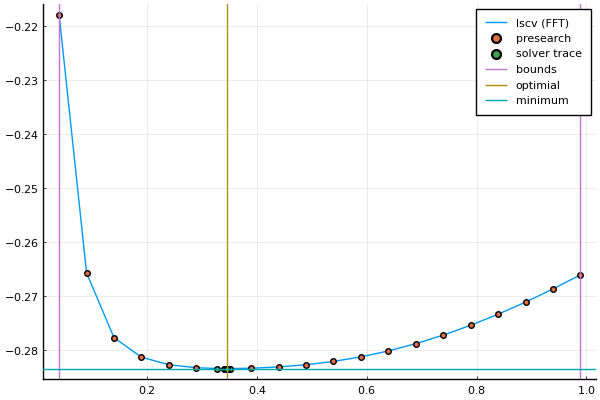

In [2]:
using Plots; pyplot()
plot(lscv_res)

In [3]:
h = minimizer(lscv_res)
fkde = kde(Normal, h, x, FFT())
frot = kde(Normal, rot, x, FFT())
# these are callable
@show fkde(0.3);
@show frot(-2);

fkde(0.3) = 0.38237039523949345
frot(-2) = 0.04546902308913938


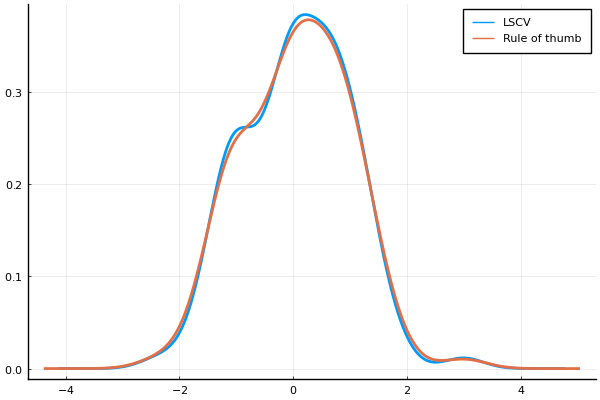

In [4]:
plot(fkde, label="LSCV", lw=2)
plot!(frot, label="Rule of thumb", lw=2)

# Further Reading
This work has been heavily influenced by Artur Gramacki's book "Nonparametric Kernel Density Estimation and Its Computational Aspects" 